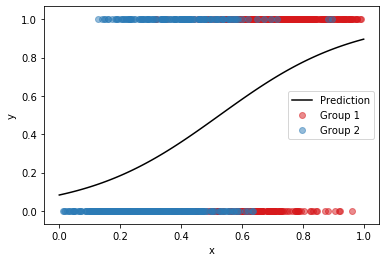

In [1]:
import os
import warnings
import tikzplotlib
import numpy as np
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore', category=FutureWarning)
from input_parameters import input_parameters
from model import model

np.random.seed(0)
results_folder = 'results/outcome/'

if not os.path.exists(results_folder):
    os.makedirs(results_folder)
input_parameters = input_parameters(feedback_loop_type = 'Outcome', retraining = True, results_folder = results_folder)

Model = model(input_parameters)
t=0
g1x_0_initial, g1y_0_initial, g2x_0_initial, g2y_0_initial, px_0, py_0 = Model.plot_ML_model(t) 

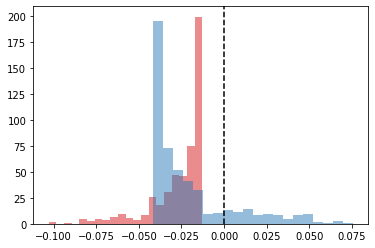

In [2]:
err0x_0, err0y_0, err1x_0, err1y_0 = Model.plot_ML_error_wrt_theta(t)

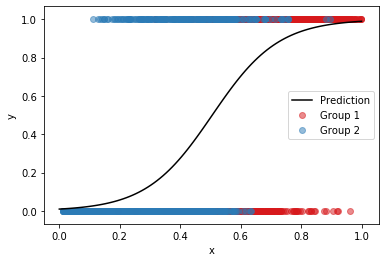

In [3]:
n_t = 2000 
t = t+n_t
Model.run(T=n_t)
g1x_0, g1y_0, g2x_0, g2y_0, px_1, py_1 = Model.plot_ML_model(t) 

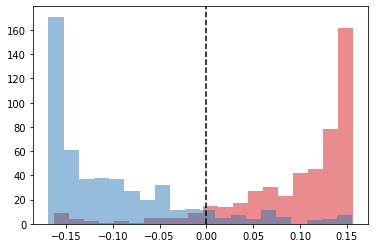

In [4]:
err0x_1, err0y_1, err1x_1, err1y_1 = Model.plot_ML_error_wrt_theta(t)

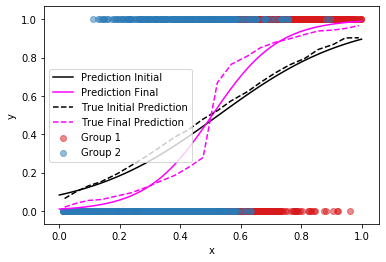

In [5]:
n_points = 100
x_points = 21
Model.ML_model_block.compare_predictions(g1x_0, g1y_0, g2x_0, g2y_0, px_0, py_0, px_1, py_1, results_folder, t, Model.prediction_block, Model.decision_block, Model.outcome_block, x_points, n_points, Model.population)

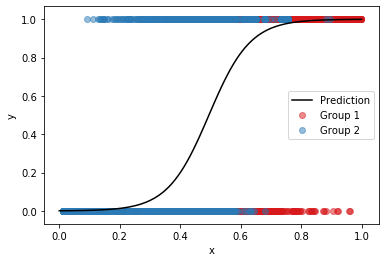

In [6]:
n_t = 8000 
t = t+n_t
Model.run(T=n_t)
g1x_0, g1y_0, g2x_0, g2y_0, px_1, py_1 = Model.plot_ML_model(t) 

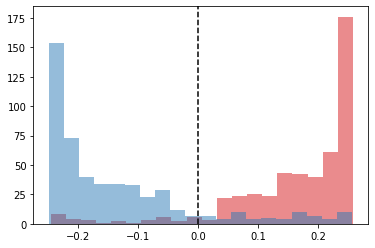

In [7]:
err0x_2, err0y_2, err1x_2, err1y_2 = Model.plot_ML_error_wrt_theta(t)

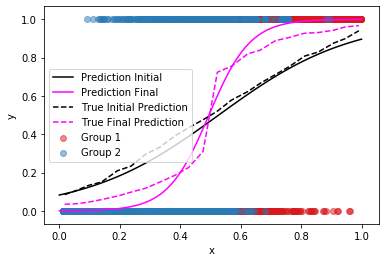

In [9]:
n_points = 100
x_points = 21
Model.ML_model_block.compare_predictions(g1x_0, g1y_0, g2x_0, g2y_0, px_0, py_0, px_1, py_1, results_folder, t, Model.prediction_block, Model.decision_block, Model.outcome_block, x_points, n_points, Model.population)

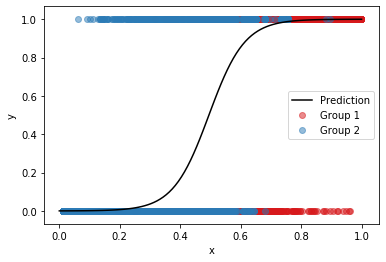

In [10]:
n_t = 10000 
t = t+n_t
Model.run(T=n_t)
g1x_0, g1y_0, g2x_0, g2y_0, px_1, py_1 = Model.plot_ML_model(t) 

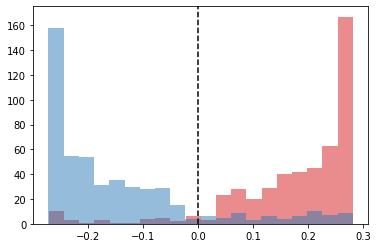

In [11]:
err0x_3, err0y_3, err1x_3, err1y_3 = Model.plot_ML_error_wrt_theta(t)

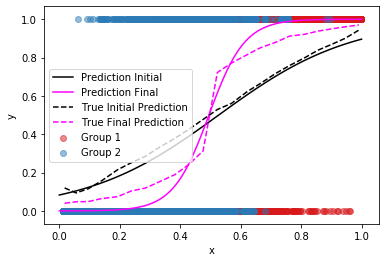

In [12]:
n_points = 100
x_points = 21
Model.ML_model_block.compare_predictions(g1x_0, g1y_0, g2x_0, g2y_0, px_0, py_0, px_1, py_1, results_folder, t, Model.prediction_block, Model.decision_block, Model.outcome_block, x_points, n_points, Model.population)

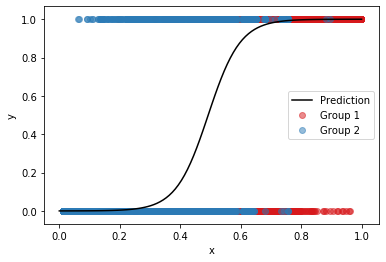

In [13]:
n_t = 30000 
t = t+n_t
Model.run(T=n_t)
g1x_0, g1y_0, g2x_0, g2y_0, px_1, py_1 = Model.plot_ML_model(t) 

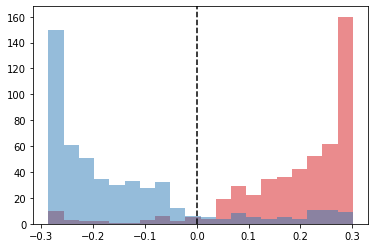

In [14]:
err0x_4, err0y_4, err1x_4, err1y_4 = Model.plot_ML_error_wrt_theta(t)

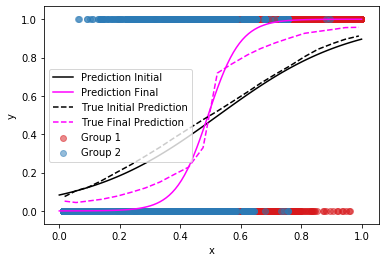

In [15]:
n_points = 500
x_points = 21
Model.ML_model_block.compare_predictions(g1x_0, g1y_0, g2x_0, g2y_0, px_0, py_0, px_1, py_1, results_folder, t, Model.prediction_block, Model.decision_block, Model.outcome_block, x_points, n_points, Model.population)

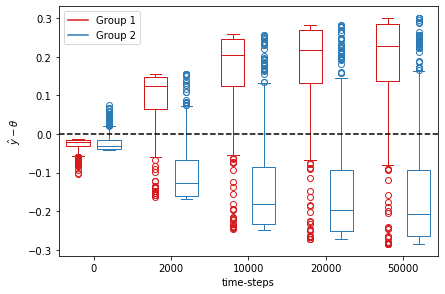

In [16]:
import matplotlib.pyplot as plt
import numpy as np


data_0 = [err0y_0,err0y_1,err0y_2,err0y_3, err0y_4]
data_1 = [err1y_0,err1y_1,err1y_2,err1y_3, err1y_4]

ticks = ['0', '2000', '10000', '20000', '50000']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

flierprops = dict(markeredgecolor='#D7191C')

bpl = plt.boxplot(data_0, positions=np.array(range(len(data_0)))*2.0-0.4, widths=0.6, flierprops=flierprops)
flierprops = dict(markeredgecolor='#2C7BB6')
bpr = plt.boxplot(data_1, positions=np.array(range(len(data_1)))*2.0+0.4, widths=0.6, flierprops=flierprops)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Group 1')
plt.plot([], c='#2C7BB6', label='Group 2')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.tight_layout()
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.savefig('boxcompare_ML.png')
plt.xlabel('time-steps')
plt.ylabel(r'$\hat{y}-\theta$')
tikzplotlib.save(results_folder+'prediction_error.tikz')